In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import os
sys.path.append("D:\Research\Codes\Hybrid-vpic/")
from tracking_data_read import Tracer
from read_field_data import loadinfo, load_data_at_certain_t, load_data

In [2]:
def mat_shift(M):
    n1, n2 = M.shape[0], M.shape[1]
    M_shift = np.zeros_like(M)
    M_shift[0:n1//2, :] = M[n1//2:, :]
    M_shift[n1//2:, :] = M[0:n1//2, :]
    return M_shift

In [3]:

"""
READ TRACER DATA
"""
num_particle_traj = 35000
ratio_emax = 1
species_name_lst = ["ion_c", "ion_b"]
species_fullname_lst = ["core ion", "beam ion"]
sample_lst = [1, 1]
ntraj_lst = [35000, 20000]
#%%
fdir = f"D:/Research/Codes/Hybrid-vpic/HybridVPIC-main/reconnection/trace_data/"
# 用于存储文件名的字典
file_names = {}
# 用于存储 Tracer 对象的字典
tracers = {}
# 遍历 index 列表
for index in [1]:
    # 遍历物种名称列表
    for j in range(len(species_name_lst)):
        # 生成文件名
        fname_key = f"fname{index}_{species_name_lst[j]}"
        file_names[
            fname_key] = f"{species_name_lst[j]}_tracer/{species_name_lst[j]}s_ntraj{ntraj_lst[j]}_{ratio_emax}emax_{index}.h5p"
        # 生成 Tracer 对象
        tracer_key = f"{species_name_lst[j]}_tracer_{index}"
        print(f'Loading {species_name_lst[j]} tracer data...')
        tracers[tracer_key] = Tracer(
            species_name_lst[j],
            species_fullname_lst[j],
            fdir,
            file_names[fname_key],
            sample_step=sample_lst[j]
        )

Loading ion_c tracer data...
['Particle#1', 'Particle#10', 'Particle#1002438657', 'Particle#1002438658', 'Particle#1002438659', 'Particle#1002438661', 'Particle#1002438662', 'Particle#1002438666', 'Particle#1002438668', 'Particle#1002438669', 'Particle#1002438672', 'Particle#1002438674', 'Particle#1002438675', 'Particle#1002438676', 'Particle#1002438677', 'Particle#1002438678', 'Particle#1002438679', 'Particle#1002438680', 'Particle#1002438681', 'Particle#1002438683', 'Particle#1002438684', 'Particle#1002438687', 'Particle#1002438688', 'Particle#1002438689', 'Particle#1002438690', 'Particle#1002438691', 'Particle#1002438694', 'Particle#1002438695', 'Particle#1002438696', 'Particle#1002438697', 'Particle#1002438698', 'Particle#1002438699', 'Particle#1002438700', 'Particle#1002438701', 'Particle#1002438702', 'Particle#1002438703', 'Particle#1002438704', 'Particle#1002438705', 'Particle#1002438707', 'Particle#1002438708', 'Particle#1002438709', 'Particle#1002438711', 'Particle#1002438712'

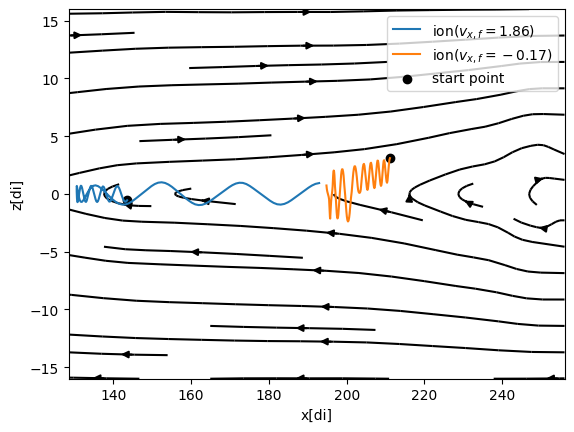

In [20]:
tracer = tracers['ion_c_tracer_1']
tracer_b = tracers['ion_b_tracer_1']
field_dir = "field_data/field_data_77/"
epoch = 75
nx, ny, nz = int(loadinfo(field_dir)[0]), int(loadinfo(field_dir)[1]), int(loadinfo(field_dir)[2])
Lx, Ly, Lz = int(loadinfo(field_dir)[3]), int(loadinfo(field_dir)[4]), int(loadinfo(field_dir)[5])
hx, hy, hz = Lx/nx, Ly/ny, Lz/nz
bx = load_data_at_certain_t(field_dir+"bx.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
by = load_data_at_certain_t(field_dir+"by.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
bz = load_data_at_certain_t(field_dir+"bz.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ex = load_data_at_certain_t(field_dir+"ex.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ey = load_data_at_certain_t(field_dir+"ey.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
ez = load_data_at_certain_t(field_dir+"ez.gda", i_t=epoch, num_dim1=nx, num_dim2=ny, num_dim3=nz)
condition = np.where((tracer.data['ux'][:,-1]>1)&(tracer.data['ux'][:,-1]<4)&(tracer.data['x'][:,-1]>60)&(tracer.data['x'][:,-1]<70)&(tracer.data['z'][:,-1]<2)&(tracer.data['z'][:,-1]>-2))
condition_2 = np.where((tracer.data['ux'][:,-1]>-0.5)&(tracer.data['ux'][:,-1]<1)&(tracer.data['x'][:,-1]>60)&(tracer.data['x'][:,-1]<70)&(tracer.data['z'][:,-1]<2)&(tracer.data['z'][:,-1]>-2))
condition_b = np.where((tracer_b.data['x'][:,-1]>60)&(tracer_b.data['x'][:,-1]<70)&(tracer_b.data['z'][:,-1]<2)&(tracer_b.data['z'][:,-1]>-2))
ion_plot_tag = 10
ion_plot_tag_2 = 220
x, y, z = np.linspace(0, Lx, nx), np.linspace(0, Ly, ny), np.linspace(-Lz/2, Lz/2, nz)
vx_f = tracer.data['ux'][condition[0][ion_plot_tag]][-1]
vx_f_2 = tracer.data['ux'][condition_2[0][ion_plot_tag_2]][-1]
plt.streamplot(x[nx//2:], z, mat_shift(bx)[nx//2:,].T, mat_shift(bz)[nx//2:,:].T, color='k', density=0.5)
plt.plot((tracer.data['x'][condition[0][ion_plot_tag]]+128)%256, tracer.data['z'][condition[0][ion_plot_tag]],label=rf'ion($v_{{x,f}}={vx_f:.2f}$)')

plt.plot((tracer.data['x'][condition_2[0][ion_plot_tag_2]]+128)%256, tracer.data['z'][condition_2[0][ion_plot_tag_2]],label=rf'ion($v_{{x,f}}={vx_f_2:.2f}$)')
plt.scatter((tracer.data['x'][condition_2[0][ion_plot_tag_2]][0]+128)%256, tracer.data['z'][condition_2[0][ion_plot_tag_2]][0],c='k')
plt.scatter((tracer.data['x'][condition[0][ion_plot_tag]][0]+128)%256, tracer.data['z'][condition[0][ion_plot_tag]][0],c='k', label='start point')
plt.xlabel('x[di]')
plt.ylabel('z[di]')
plt.legend()
# plt.hist(np.min((tracer.data['x'][condition_2[0]]), axis=1), alpha=0.5, label='v_x<1', density=True)
# plt.hist(np.min((tracer.data['x'][condition[0]]), axis=1), alpha=0.5, label='v_x>1', density=True)
# plt.xlabel('Minimum distance to the X point[di]', fontsize=15)
# plt.ylabel('Probability density', fontsize=15)
# plt.legend()

(35000, 151)


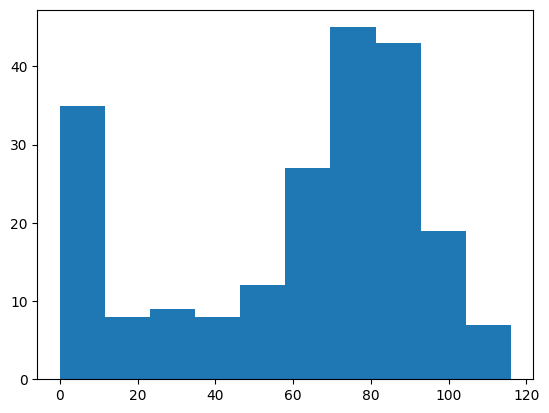

In [ ]:
plt.hist(np.argmin(np.abs(tracer.data['x'][condition[0],:]),axis=1))
# print(tracer.data['x'].shape)

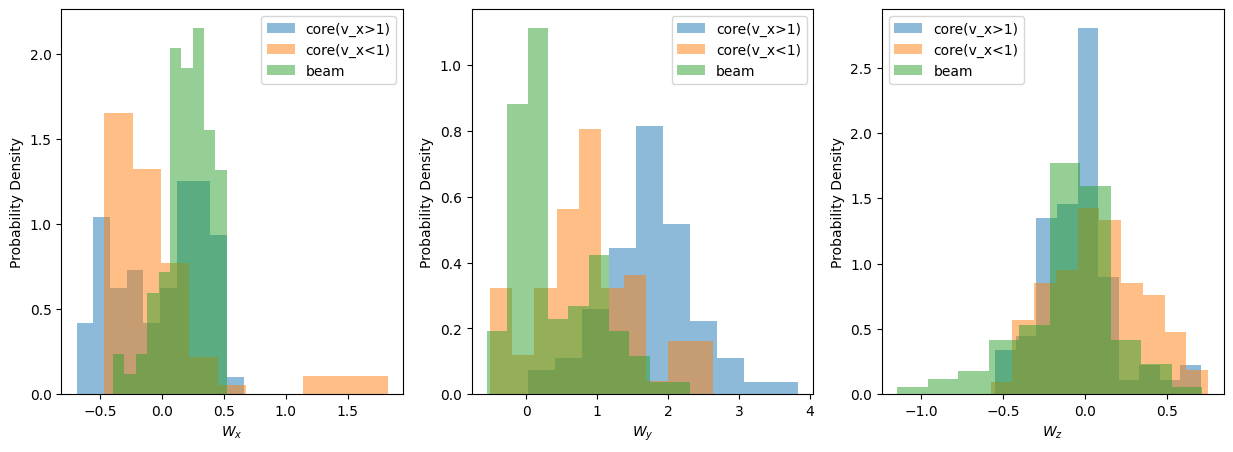

In [13]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))
Wx_1 = np.sum(tracer.data['ux'][condition[0],:]*tracer.data['ex'][condition[0],:],axis=1)
Wx_2 = np.sum(tracer.data['ux'][condition_2[0],:]*tracer.data['ex'][condition_2[0],:],axis=1)
Wy_1 = np.sum(tracer.data['uy'][condition[0],:]*tracer.data['ey'][condition[0],:],axis=1)
Wy_2 = np.sum(tracer.data['uy'][condition_2[0],:]*tracer.data['ey'][condition_2[0],:],axis=1)
ax=axes[0]
ax.hist(np.sum(tracer.data['ux'][condition]*tracer.data['ex'][condition],axis=1),density=True,alpha=0.5, label='core(v_x>1)')

ax.hist(np.sum(tracer.data['ux'][condition_2]*tracer.data['ex'][condition_2],axis=1),density=True,alpha=0.5, label='core(v_x<1)')
ax.hist(np.sum(tracer_b.data['ux'][condition_b]*tracer_b.data['ex'][condition_b],axis=1),density=True,alpha=0.5, label='beam')
ax.set_xlabel(r'$W_x$')
ax.set_ylabel('Probability Density')
ax.legend()
ax=axes[1]
ax.hist(np.sum(tracer.data['uy'][condition[0],:]*tracer.data['ey'][condition[0],:],axis=1),density=True,alpha=0.5, label='core(v_x>1)')

ax.hist(np.sum(tracer.data['uy'][condition_2[0],:]*tracer.data['ey'][condition_2[0],:],axis=1),density=True,alpha=0.5, label='core(v_x<1)')
ax.hist(np.sum(tracer_b.data['uy'][condition_b[0],:]*tracer_b.data['ey'][condition_b[0],:],axis=1),density=True,alpha=0.5, label='beam')
ax.set_xlabel(r'$W_y$')
ax.set_ylabel('Probability Density')
ax.legend()
ax=axes[2]
ax.hist(np.sum(tracer.data['uz'][condition]*tracer.data['ez'][condition],axis=1),density=True,alpha=0.5, label='core(v_x>1)')

ax.hist(np.sum(tracer.data['uz'][condition_2]*tracer.data['ez'][condition_2],axis=1),density=True,alpha=0.5, label='core(v_x<1)')
ax.hist(np.sum(tracer_b.data['uz'][condition_b]*tracer_b.data['ez'][condition_b],axis=1),density=True,alpha=0.5, label='beam')
ax.set_xlabel(r'$W_z$')
ax.set_ylabel('Probability Density')
ax.legend()

2.365438222885132


Text(0, 0.5, '$v_z/v_A$')

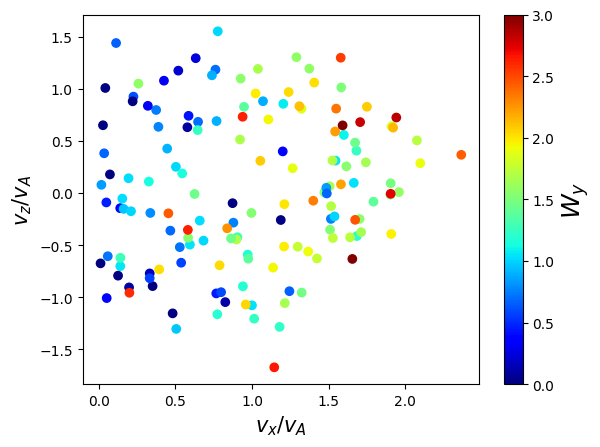

In [14]:
plt.scatter(tracer.data['ux'][condition[0],-1],tracer.data['uz'][condition[0],-1], c=Wy_1, cmap='jet', vmin=0, vmax=3)
plt.scatter(tracer.data['ux'][condition_2[0],-1],tracer.data['uz'][condition_2[0],-1], c=Wy_2, cmap='jet', vmin=0, vmax=3)
cbar = plt.colorbar()
cbar.set_label(r"$W_y$", fontsize=18)
print((tracer.data['ux'][condition[0],-1]).max())
plt.xlabel(r"$v_x/v_A$", fontsize=15)
plt.ylabel(r"$v_z/v_A$", fontsize=15)